In [1]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

import scipy.stats as stats

from scipy.stats import zscore

from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf

import math

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.preprocessing import scale
from sklearn import metrics,model_selection

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

In [155]:
df_news = pd.read_csv("Election_Data1.csv",encoding='utf-8',index_col=0)

In [139]:
df_news.head(5)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male


In [140]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


In [141]:
df_news.describe(include='all')

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1525,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Labour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female
freq,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812
mean,NaN,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295,NaN
std,NaN,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315,NaN
min,NaN,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN
25%,NaN,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,NaN
50%,NaN,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,NaN
75%,NaN,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,NaN


In [142]:
df_news.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [143]:
df_news.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [144]:
df_news.shape

(1525, 9)

In [145]:
def check_normaldistrib(df_col):
    print('Mean is %f, Median is %f, Mode(s) are ' %(np.mean(df_col), np.median(df_col)),end="")
    modelist=stats.mode(df_col,axis=None)
    print("%.4f" %(modelist[0]))

def check_for_outliers(df_col):
    Q1 = df_col.quantile(0.25)
    Q3 =  df_col.quantile(0.75)
    IQR = Q3 - Q1
    return any((df_col < (Q1 - 1.5 * IQR)) | (df_col > (Q3 + 1.5 * IQR)))

In [146]:
def univariate_analysis(df_input):
    ctr=0
    for i in df_input.columns:
        ctr=ctr+1;
        print('\n %d. Univariate analysis for %s \n' % (ctr, i))
        w, p_value=stats.shapiro(df_input[i])
        check_normaldistrib(df_input[i])
        if check_for_outliers(df_input[i]):
            print('Column %s has outliers' %(i))
        else:
            print('Column %s does not have outliers' %(i))
        plt.figure(figsize=(15,3))
        plt.subplot(1,3,1)
        sns.boxplot(df_input[i])
        plt.subplot(1,3,2)
        sns.distplot(df_input[i],hist=False)
        plt.subplot(1,3,3)
        plt.hist(df_input[i])
        plt.show()
        if p_value > 0.05:
            print('Column %s is normally distributed' %(i))
        else:
            print ('Column %s is not normally distributed' %(i))

In [148]:
def bivariate_analysis(df_dataset,df_input,df_target):
    ctr=0
    for col in df_input.columns:
        ctr=ctr+1
        print('\n %d. bivariate analysis for %s \n' % (ctr, col))
        plt.figure(figsize=(3,3))
        sns.stripplot(df_dataset[df_target], df_dataset[col], jitter=True) 
        plt.show()


 1. Univariate analysis for age 

Mean is 54.182295, Median is 53.000000, Mode(s) are 37.0000
Column age does not have outliers


C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


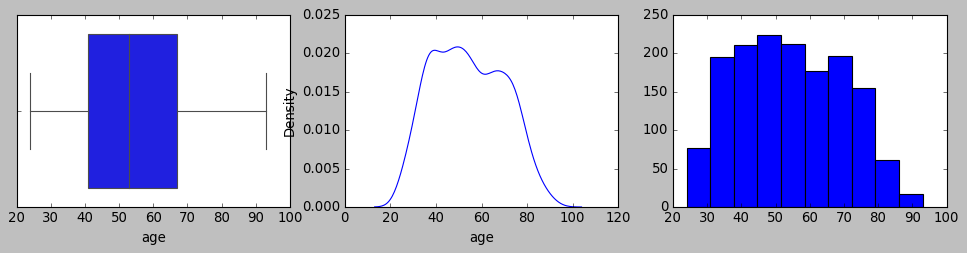

Column age is not normally distributed

 2. Univariate analysis for economic.cond.national 

Mean is 3.245902, Median is 3.000000, Mode(s) are 3.0000
Column economic.cond.national has outliers


C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


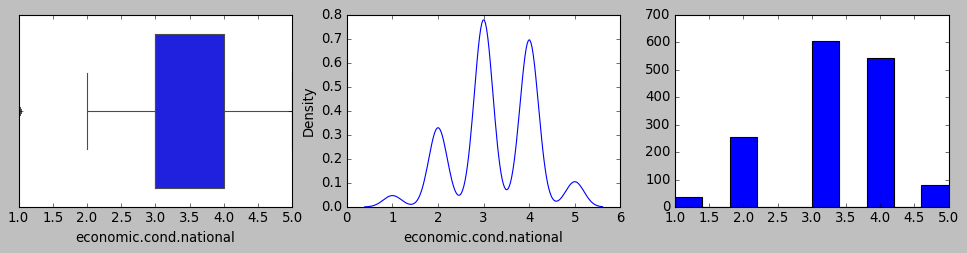

Column economic.cond.national is not normally distributed

 3. Univariate analysis for economic.cond.household 

Mean is 3.140328, Median is 3.000000, Mode(s) are 3.0000
Column economic.cond.household has outliers


C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


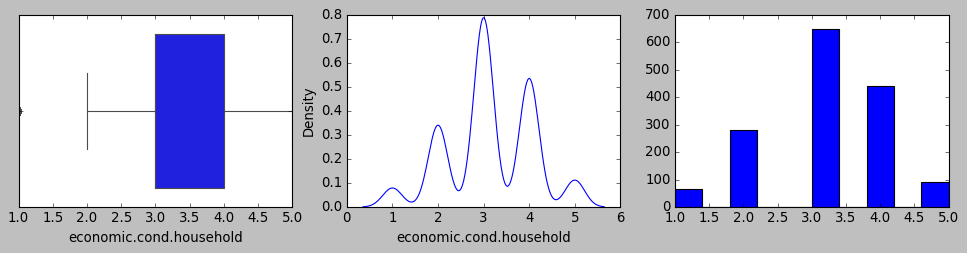

Column economic.cond.household is not normally distributed

 4. Univariate analysis for Blair 

Mean is 3.334426, Median is 4.000000, Mode(s) are 4.0000
Column Blair does not have outliers


C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


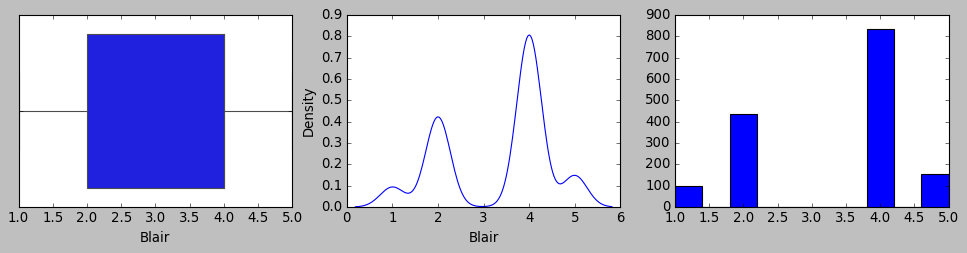

Column Blair is not normally distributed

 5. Univariate analysis for Hague 

Mean is 2.746885, Median is 2.000000, Mode(s) are 2.0000
Column Hague does not have outliers


C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


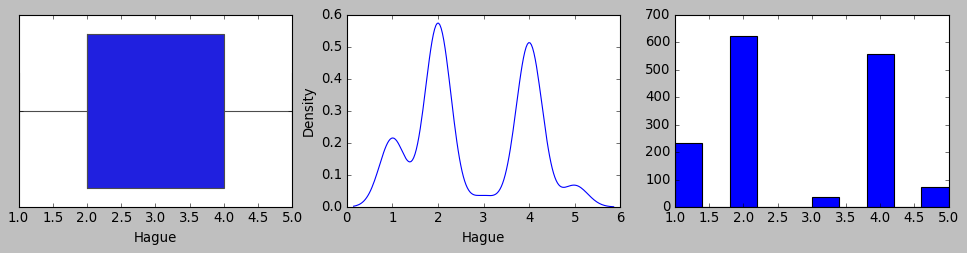

Column Hague is not normally distributed

 6. Univariate analysis for Europe 

Mean is 6.728525, Median is 6.000000, Mode(s) are 11.0000
Column Europe does not have outliers


C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


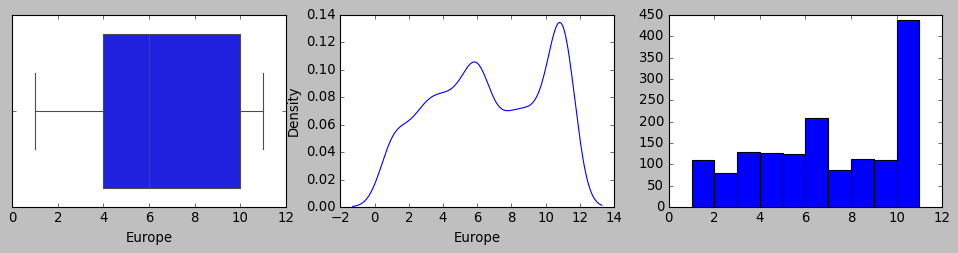

Column Europe is not normally distributed

 7. Univariate analysis for political.knowledge 

Mean is 1.542295, Median is 2.000000, Mode(s) are 2.0000
Column political.knowledge does not have outliers


C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


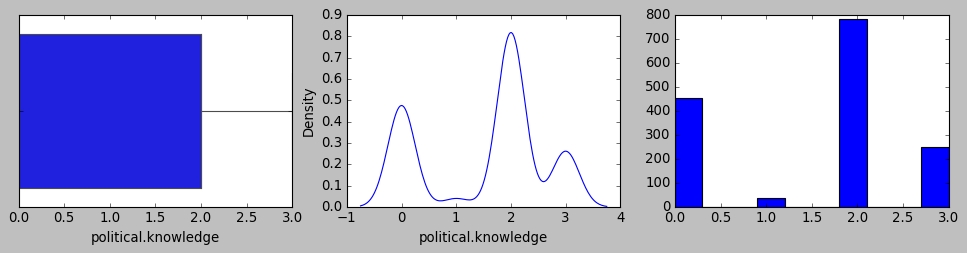

Column political.knowledge is not normally distributed


In [149]:
univariate_analysis(df_news.drop(columns=['vote','gender']))


 1. bivariate analysis for age 



C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


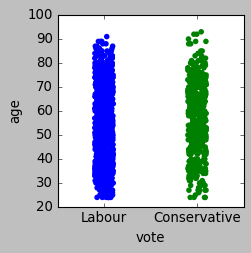


 2. bivariate analysis for economic.cond.national 



C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


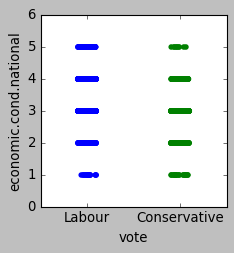


 3. bivariate analysis for economic.cond.household 



C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


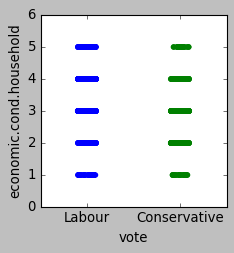


 4. bivariate analysis for Blair 



C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


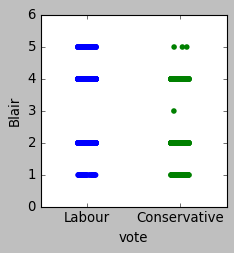


 5. bivariate analysis for Hague 



C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


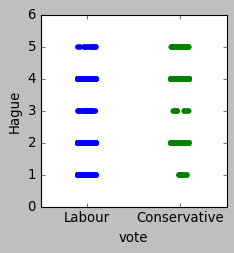


 6. bivariate analysis for Europe 



C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


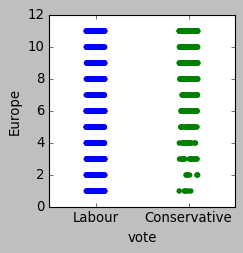


 7. bivariate analysis for political.knowledge 



C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


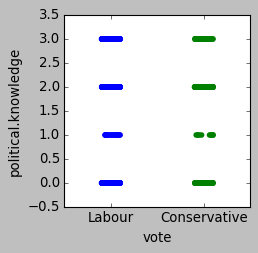

In [150]:
bivariate_analysis(df_news,df_news.drop(columns=['vote','gender']),'vote')

<Figure size 400x400 with 0 Axes>

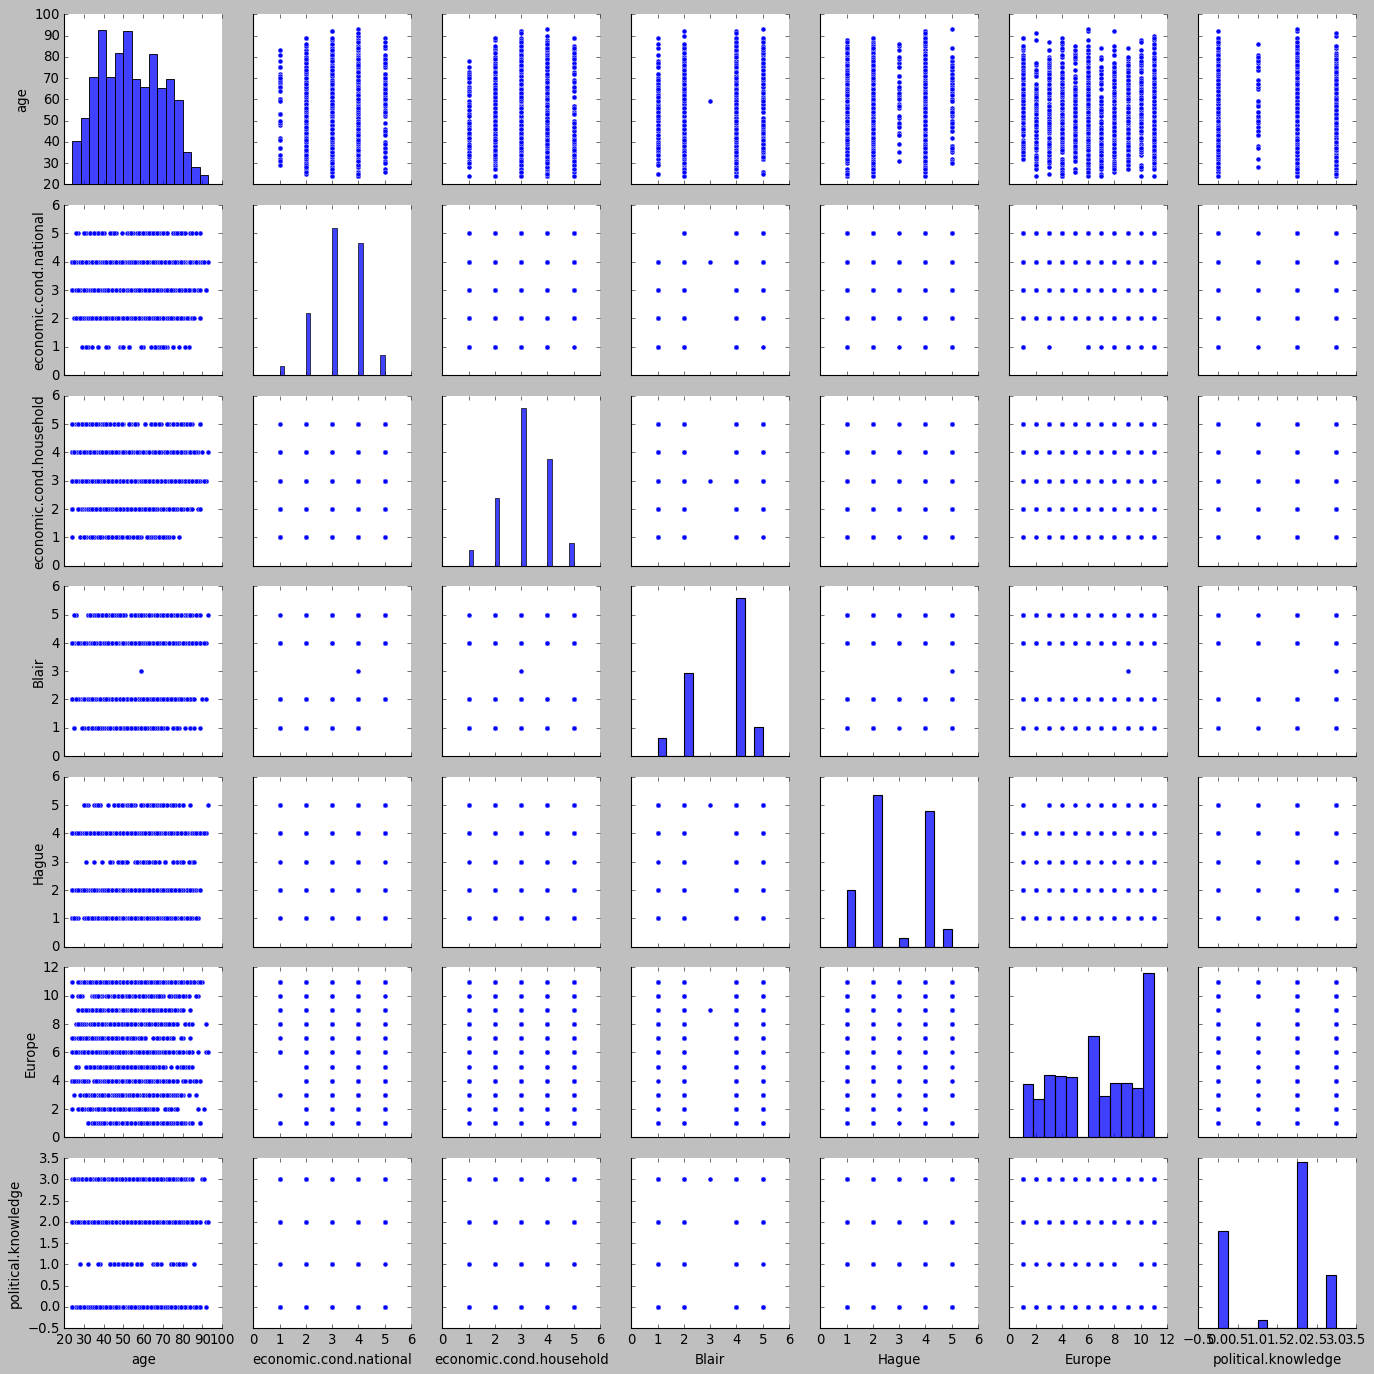

In [116]:
plt.figure(figsize=(5,5))
sns.pairplot(df_news)

<AxesSubplot:>

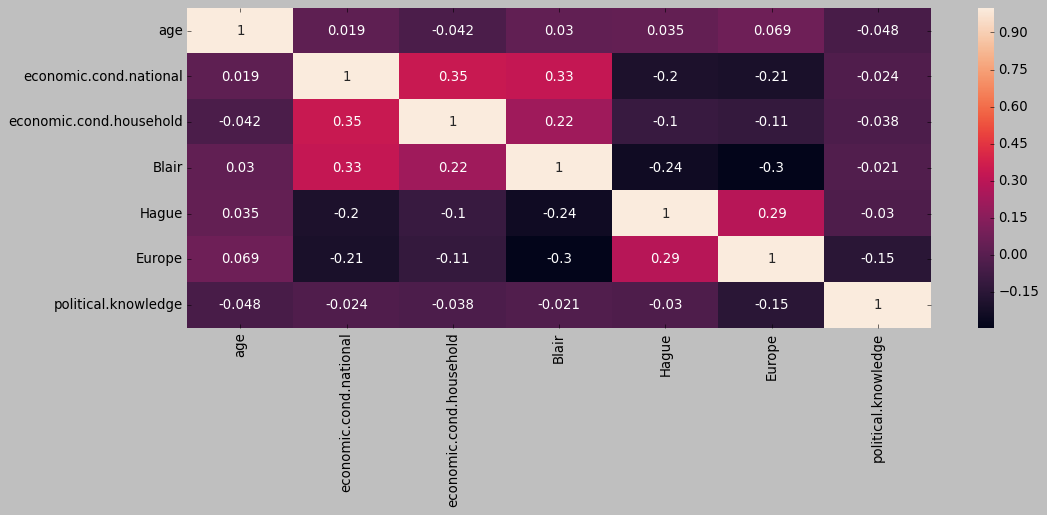

In [151]:
plt.figure(figsize=(15,5))
sns.heatmap(df_news.corr(), annot=True)

In [152]:
for column in df_news.columns:
    if df_news[column].dtype == 'object':
        print(column.upper(),': ',df_news[column].nunique())
        print(df_news[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




In [156]:
df_news = pd.get_dummies(df_news, columns=['gender'],drop_first=True)

In [157]:
feature_encoding = {"vote":     {"Labour": 1, "Conservative": 0}}
df_news=df_news.replace(feature_encoding)
df_news.rename(columns={"political.knowledge": "political_knowledge",
                        "economic.cond.national":"economic_cond_national",
                        "economic.cond.household":"economic_cond_household"
                       },inplace=True)
                         
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1525 non-null   int64
 1   age                      1525 non-null   int64
 2   economic_cond_national   1525 non-null   int64
 3   economic_cond_household  1525 non-null   int64
 4   Blair                    1525 non-null   int64
 5   Hague                    1525 non-null   int64
 6   Europe                   1525 non-null   int64
 7   political_knowledge      1525 non-null   int64
 8   gender_male              1525 non-null   uint8
dtypes: int64(8), uint8(1)
memory usage: 108.7 KB


In [158]:
df_news.head(10)

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender_male
1,1,43,3,3,4,1,2,2,0
2,1,36,4,4,4,4,5,2,1
3,1,35,4,4,5,2,3,2,1
4,1,24,4,2,2,1,4,0,0
5,1,41,2,2,1,1,6,2,1
6,1,47,3,4,4,4,4,2,1
7,1,57,2,2,4,4,11,2,1
8,1,77,3,4,4,1,1,0,1
9,1,39,3,3,4,4,11,0,0
10,1,70,3,2,5,1,11,2,1


In [159]:
df_news_scaled=df_news.drop(columns=['vote'])
df_news_scaled=df_news_scaled.apply(zscore)
df_news_scaled.head(5)

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender_male
1,-0.711973,-0.279218,-0.150948,0.566716,-1.419886,-1.434426,0.422643,-0.937059
2,-1.157661,0.856268,0.924730,0.566716,1.018544,-0.524358,0.422643,1.067169
3,-1.221331,0.856268,0.924730,1.418187,-0.607076,-1.131070,0.422643,1.067169
4,-1.921698,0.856268,-1.226625,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059
5,-0.839313,-1.414704,-1.226625,-1.987695,-1.419886,-0.221002,0.422643,1.067169



 1. Univariate analysis for age 

Mean is 0.000000, Median is -0.075276, Mode(s) are -1.0940
Column age does not have outliers


C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


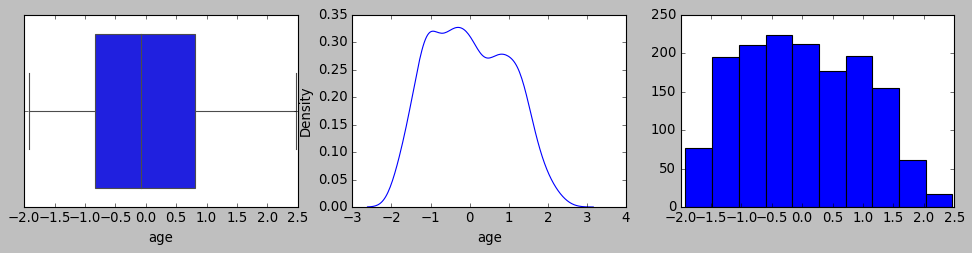

Column age is not normally distributed

 2. Univariate analysis for economic_cond_national 

Mean is 0.000000, Median is -0.279218, Mode(s) are -0.2792
Column economic_cond_national has outliers


C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


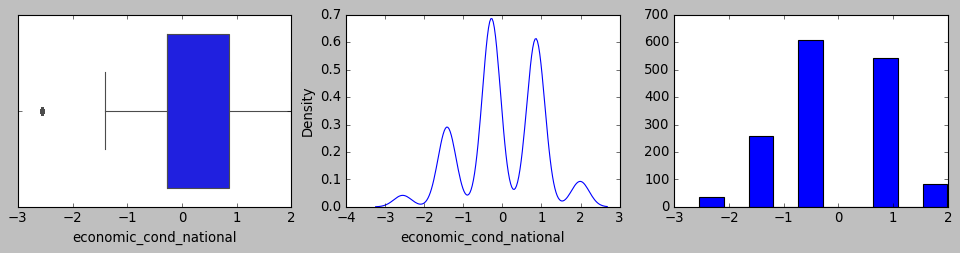

Column economic_cond_national is not normally distributed

 3. Univariate analysis for economic_cond_household 

Mean is -0.000000, Median is -0.150948, Mode(s) are -0.1509
Column economic_cond_household has outliers


C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


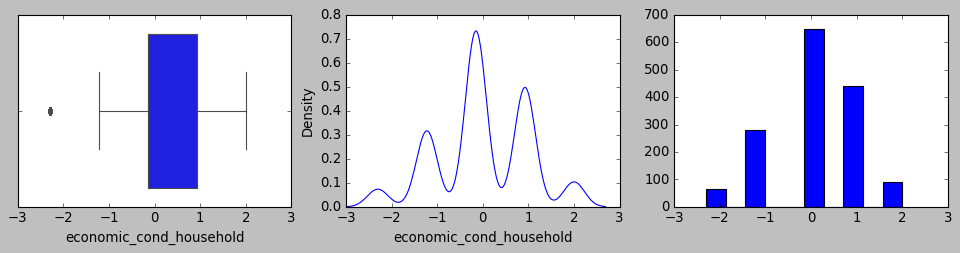

Column economic_cond_household is not normally distributed

 4. Univariate analysis for Blair 

Mean is 0.000000, Median is 0.566716, Mode(s) are 0.5667
Column Blair does not have outliers


C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


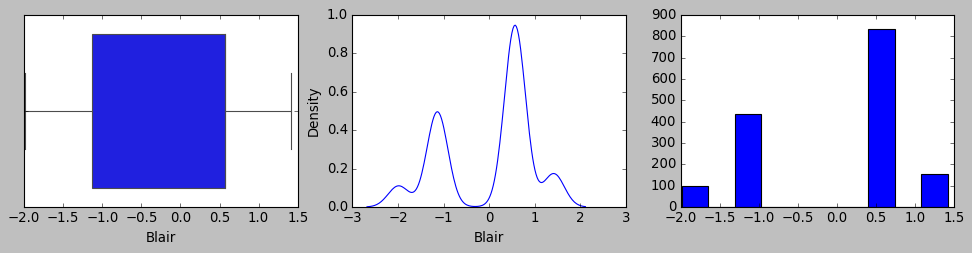

Column Blair is not normally distributed

 5. Univariate analysis for Hague 

Mean is -0.000000, Median is -0.607076, Mode(s) are -0.6071
Column Hague does not have outliers


C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


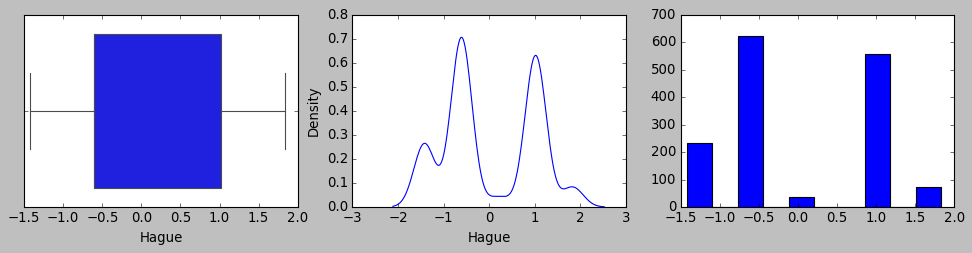

Column Hague is not normally distributed

 6. Univariate analysis for Europe 

Mean is -0.000000, Median is -0.221002, Mode(s) are 1.2958
Column Europe does not have outliers


C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


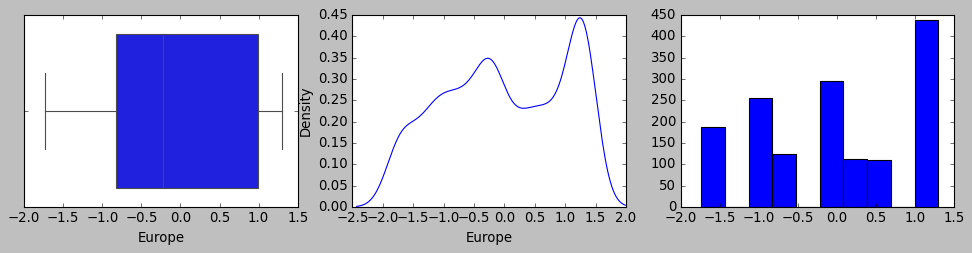

Column Europe is not normally distributed

 7. Univariate analysis for political_knowledge 

Mean is -0.000000, Median is 0.422643, Mode(s) are 0.4226
Column political_knowledge does not have outliers


C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


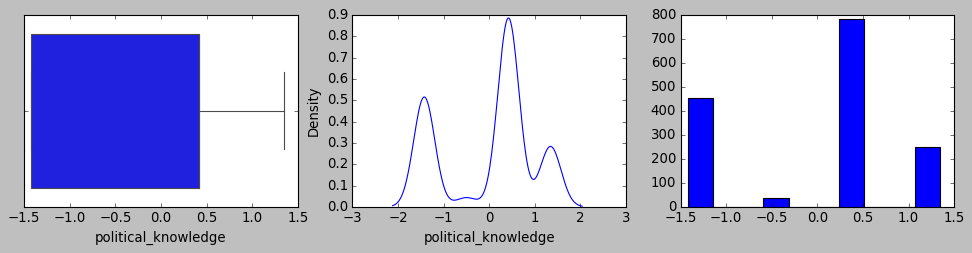

Column political_knowledge is not normally distributed

 8. Univariate analysis for gender_male 

Mean is -0.000000, Median is -0.937059, Mode(s) are -0.9371
Column gender_male does not have outliers


C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


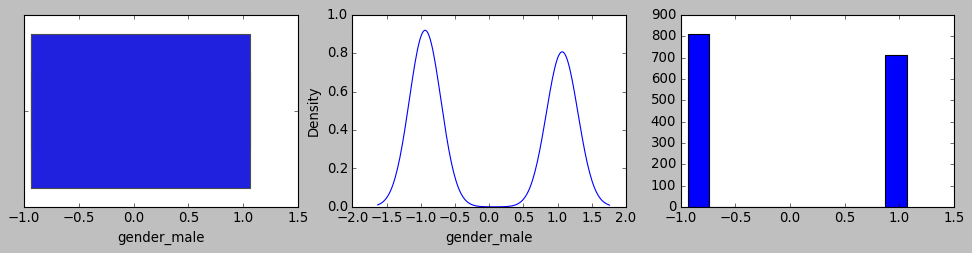

Column gender_male is not normally distributed


In [160]:
univariate_analysis(df_news_scaled)

In [161]:
df_news_treated = df_news_scaled.copy()

ec_cond_nat_IQR= df_news_treated['economic_cond_national'].quantile(0.75) -df_news_treated['economic_cond_national'].quantile(0.25)
whisker_left_eccondnat=float(np.percentile(df_news_treated['economic_cond_national'],[25]))-(1.5*ec_cond_nat_IQR)
df_news_treated.loc[df_news_treated[df_news_treated['economic_cond_national']<whisker_left_eccondnat].index,'economic_cond_national']=whisker_left_eccondnat
print(whisker_left_eccondnat)

ec_cond_hh_IQR= df_news_treated['economic_cond_household'].quantile(0.75) -df_news_treated['economic_cond_household'].quantile(0.25)
whisker_left_eccondhh=float(np.percentile(df_news_treated['economic_cond_household'],[25]))-(1.5*ec_cond_nat_IQR)
df_news_treated.loc[df_news_treated[df_news_treated['economic_cond_household']<whisker_left_eccondhh].index,'economic_cond_household']=whisker_left_eccondhh
print(whisker_left_eccondhh)
# economic.cond.national

# economic.cond.household

-1.982446356170465
-1.8541761260815273


In [162]:
df_news_treated.describe()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender_male
count,1.525000e+03,1525.000000,1525.000000,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03,1.525000e+03
mean,1.260922e-16,0.013775,0.019100,4.322954e-16,-1.560864e-16,-3.619691e-16,-6.921968e-16,-1.948896e-16
std,1.000328e+00,0.968499,0.959608,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00,1.000328e+00
min,-1.921698e+00,-1.982446,-1.854176,-1.987695e+00,-1.419886e+00,-1.737782e+00,-1.424148e+00,-9.370586e-01
25%,-8.393129e-01,-0.279218,-0.150948,-1.136225e+00,-6.070758e-01,-8.277143e-01,-1.424148e+00,-9.370586e-01
50%,-7.527638e-02,-0.279218,-0.150948,5.667164e-01,-6.070758e-01,-2.210023e-01,4.226427e-01,-9.370586e-01
75%,8.160995e-01,0.856268,0.924730,5.667164e-01,1.018544e+00,9.924217e-01,4.226427e-01,1.067169e+00
max,2.471512e+00,1.991754,2.000408,1.418187e+00,1.831354e+00,1.295778e+00,1.346038e+00,1.067169e+00



 1. Univariate analysis for age 

Mean is 0.000000, Median is -0.075276, Mode(s) are -1.0940
Column age does not have outliers


C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


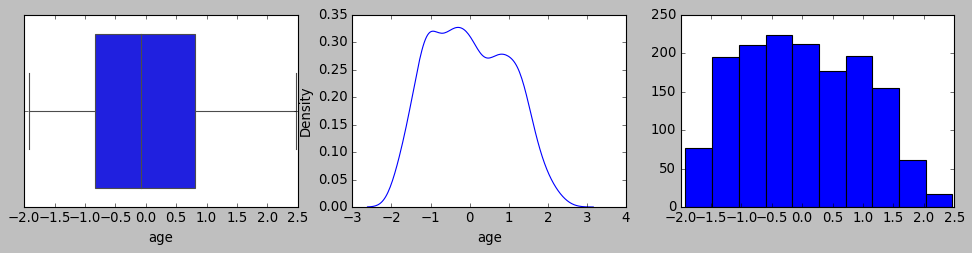

Column age is not normally distributed

 2. Univariate analysis for economic_cond_national 

Mean is 0.013775, Median is -0.279218, Mode(s) are -0.2792
Column economic_cond_national does not have outliers


C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


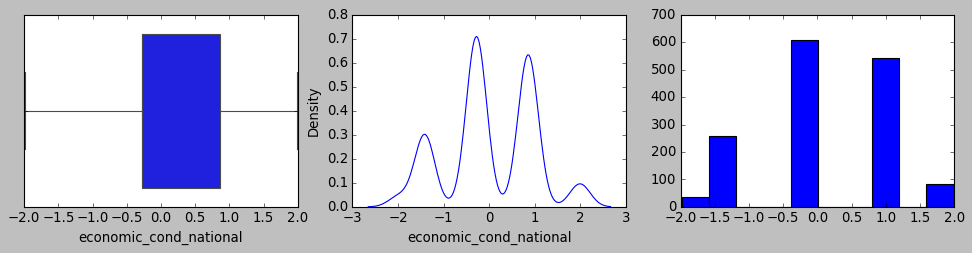

Column economic_cond_national is not normally distributed

 3. Univariate analysis for economic_cond_household 

Mean is 0.019100, Median is -0.150948, Mode(s) are -0.1509
Column economic_cond_household has outliers


C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


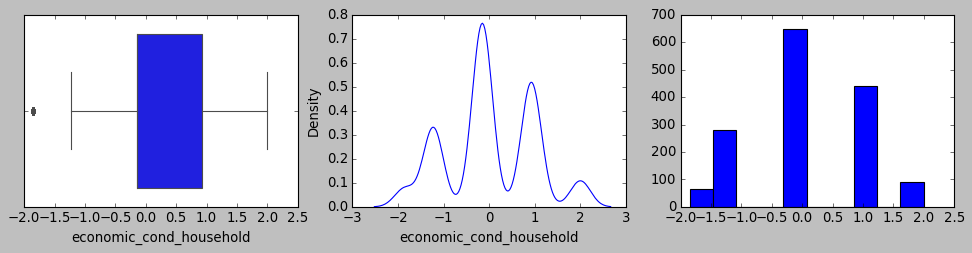

Column economic_cond_household is not normally distributed

 4. Univariate analysis for Blair 

Mean is 0.000000, Median is 0.566716, Mode(s) are 0.5667
Column Blair does not have outliers


C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


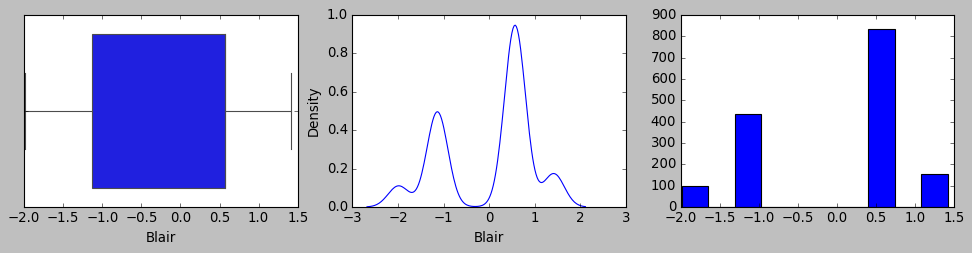

Column Blair is not normally distributed

 5. Univariate analysis for Hague 

Mean is -0.000000, Median is -0.607076, Mode(s) are -0.6071
Column Hague does not have outliers


C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


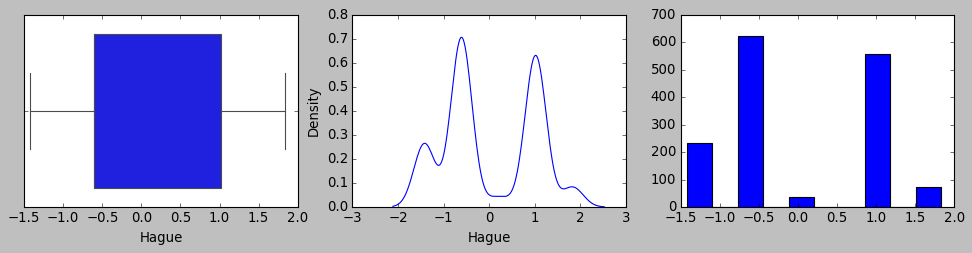

Column Hague is not normally distributed

 6. Univariate analysis for Europe 

Mean is -0.000000, Median is -0.221002, Mode(s) are 1.2958
Column Europe does not have outliers


C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


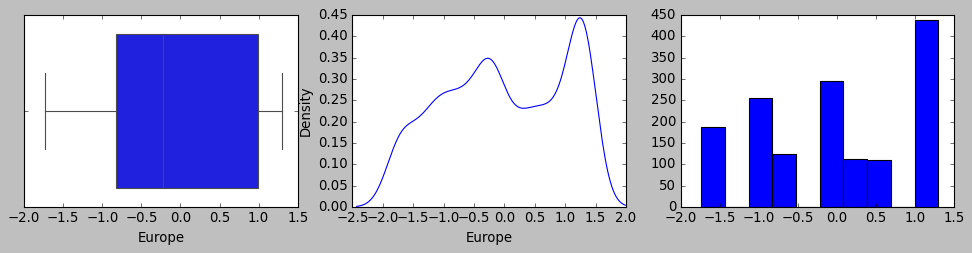

Column Europe is not normally distributed

 7. Univariate analysis for political_knowledge 

Mean is -0.000000, Median is 0.422643, Mode(s) are 0.4226
Column political_knowledge does not have outliers


C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


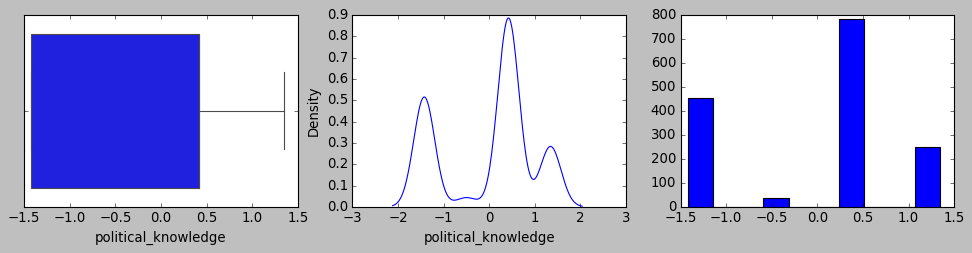

Column political_knowledge is not normally distributed

 8. Univariate analysis for gender_male 

Mean is -0.000000, Median is -0.937059, Mode(s) are -0.9371
Column gender_male does not have outliers


C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nswam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


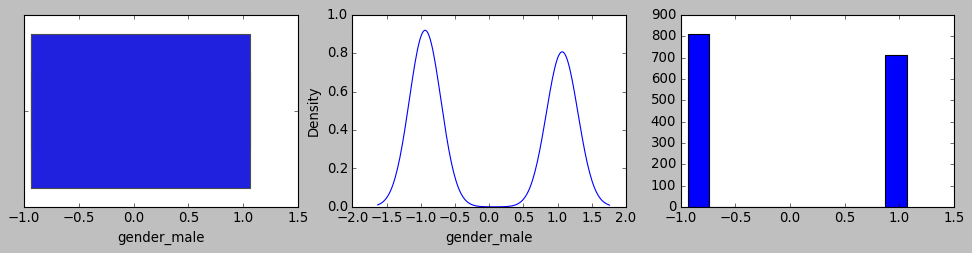

Column gender_male is not normally distributed


In [163]:
univariate_analysis(df_news_treated)

<Figure size 400x400 with 0 Axes>

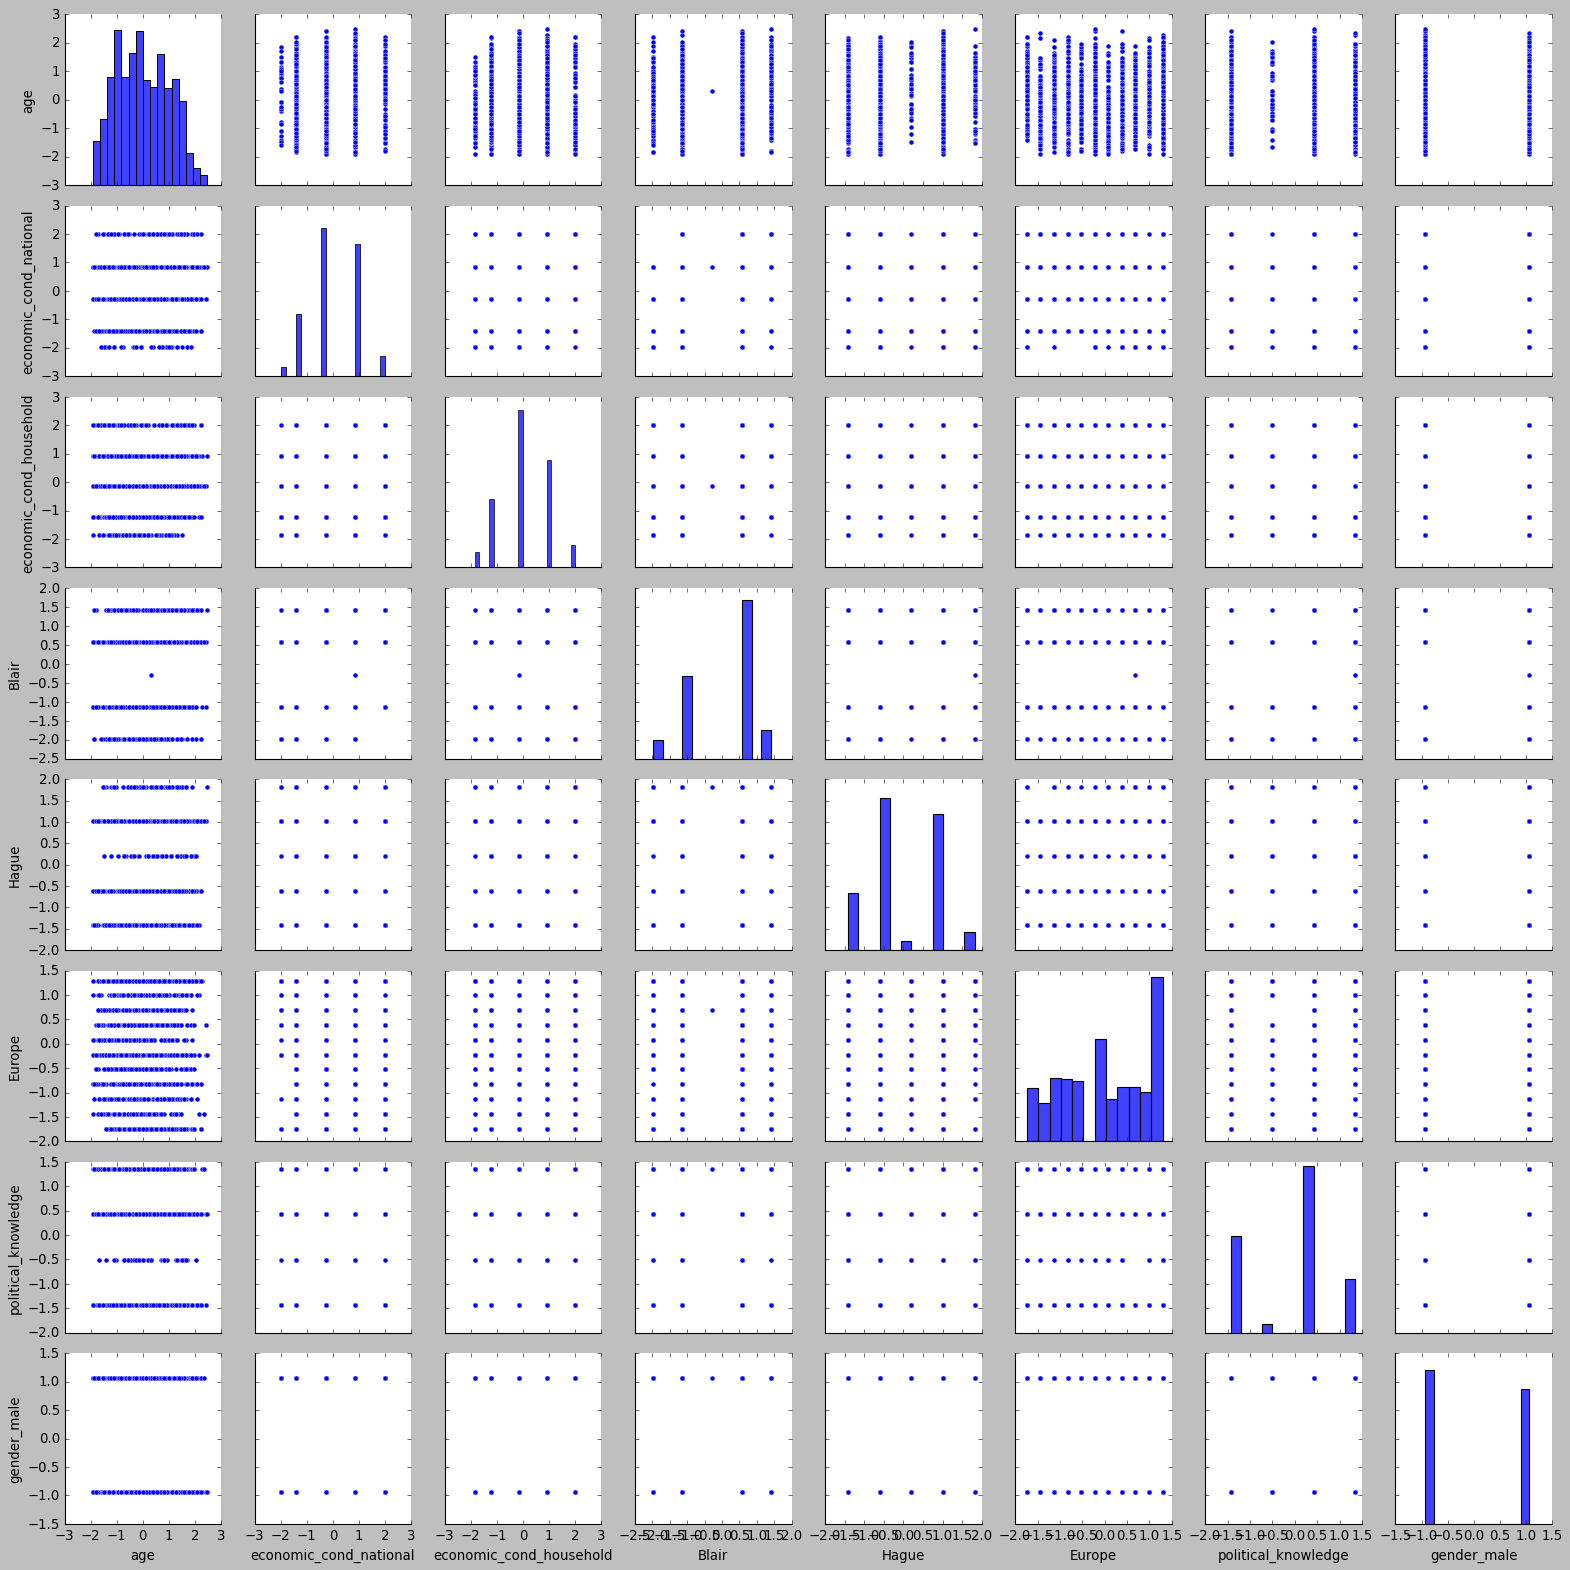

In [128]:
plt.figure(figsize=(5,5))
sns.pairplot(df_news_treated)

<AxesSubplot:>

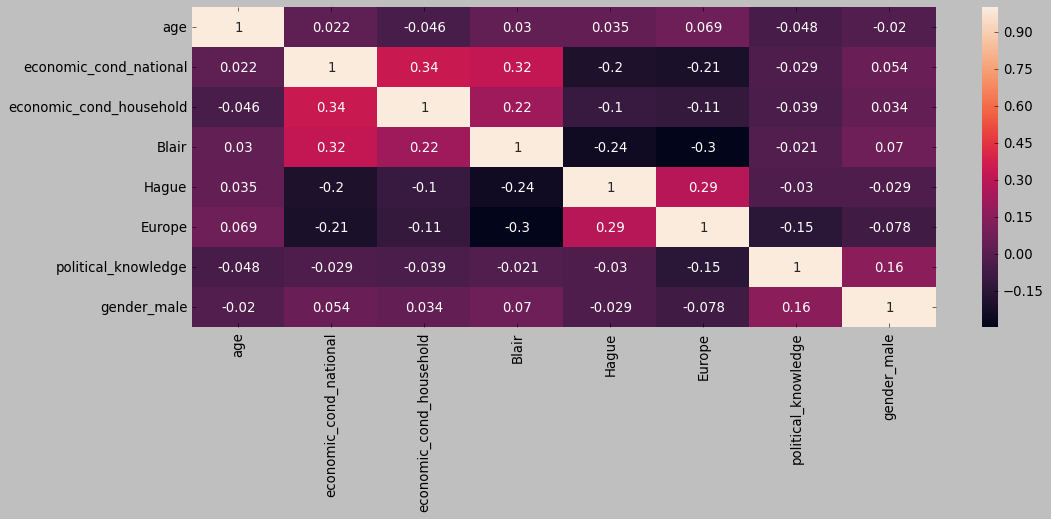

In [164]:
plt.figure(figsize=(15,5))
sns.heatmap(df_news_treated.corr(), annot=True)

In [165]:
X = df_news_treated 
Y = df_news.pop('vote')

In [166]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (1067, 8)
Number of rows and columns of the training set for the dependent variable: (1067,)
Number of rows and columns of the test set for the independent variables: (458, 8)
Number of rows and columns of the test set for the dependent variable: (458,)


In [167]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067 entries, 1494 to 407
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1067 non-null   float64
 1   economic_cond_national   1067 non-null   float64
 2   economic_cond_household  1067 non-null   float64
 3   Blair                    1067 non-null   float64
 4   Hague                    1067 non-null   float64
 5   Europe                   1067 non-null   float64
 6   political_knowledge      1067 non-null   float64
 7   gender_male              1067 non-null   float64
dtypes: float64(8)
memory usage: 75.0 KB


In [168]:
X_train.describe()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender_male
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,-0.017634,0.014497,0.017156,0.009709,0.034336,-0.019144,-0.007468,-0.011019
std,1.001376,0.973226,0.957571,0.997633,0.993164,0.990621,0.997315,0.999691
min,-1.921698,-1.982446,-1.854176,-1.987695,-1.419886,-1.737782,-1.424148,-0.937059
25%,-0.839313,-0.279218,-0.150948,-1.136225,-0.607076,-0.827714,-1.424148,-0.937059
50%,-0.075276,-0.279218,-0.150948,0.566716,-0.607076,-0.221002,0.422643,-0.937059
75%,0.816100,0.856268,0.924730,0.566716,1.018544,0.992422,0.422643,1.067169
max,2.471512,1.991754,2.000408,1.418187,1.831354,1.295778,1.346038,1.067169


In [169]:
Y_train.dtypes

dtype('int64')

In [170]:
X_test.describe()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender_male
count,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000
mean,0.041081,0.012091,0.023632,-0.022620,-0.079992,0.044600,0.017397,0.025671
std,0.997764,0.958450,0.965372,1.007309,1.013406,1.022290,1.008193,1.002435
min,-1.921698,-1.982446,-1.854176,-1.987695,-1.419886,-1.737782,-1.424148,-0.937059
25%,-0.839313,-0.279218,-0.150948,-1.136225,-0.607076,-0.827714,-1.424148,-0.937059
50%,-0.011607,-0.279218,-0.150948,0.566716,-0.607076,0.082354,0.422643,-0.937059
75%,0.816100,0.856268,0.924730,0.566716,1.018544,0.992422,0.422643,1.067169
max,2.216833,1.991754,2.000408,1.418187,1.831354,1.295778,1.346038,1.067169


In [171]:
elec_train = pd.concat([X_train, Y_train], axis=1)
# lm1 = smf.ols(formula= 'Holliday_Package ~ Salary+age+no_young_children+foreign_yes+foreign_no', data = hp_train).fit()
elec_train.describe()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,gender_male,vote
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,-0.017634,0.014497,0.017156,0.009709,0.034336,-0.019144,-0.007468,-0.011019,0.697282
std,1.001376,0.973226,0.957571,0.997633,0.993164,0.990621,0.997315,0.999691,0.459650
min,-1.921698,-1.982446,-1.854176,-1.987695,-1.419886,-1.737782,-1.424148,-0.937059,0.000000
25%,-0.839313,-0.279218,-0.150948,-1.136225,-0.607076,-0.827714,-1.424148,-0.937059,0.000000
50%,-0.075276,-0.279218,-0.150948,0.566716,-0.607076,-0.221002,0.422643,-0.937059,1.000000
75%,0.816100,0.856268,0.924730,0.566716,1.018544,0.992422,0.422643,1.067169,1.000000
max,2.471512,1.991754,2.000408,1.418187,1.831354,1.295778,1.346038,1.067169,1.000000


In [172]:
lm1 = smf.ols(formula= 'vote ~ age+political_knowledge+economic_cond_national+economic_cond_household+Blair+Hague+Europe+gender_male', data = elec_train).fit()
lm1.params.sort_values(ascending=False) 
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                   vote   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     80.62
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          6.12e-104
Time:                        18:56:22   Log-Likelihood:                -430.21
No. Observations:                1067   AIC:                             878.4
Df Residuals:                    1058   BIC:                             923.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [174]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

i=0
for column in X.columns[np.argsort(vif)]:
    print('VIF for {} is {}'.format(column,vif[np.argsort(vif)[i]]))
    i=i+1


VIF for age is 1.0139198118441526
VIF for gender_male is 1.0340695795969062
VIF for political_knowledge is 1.0584898802222538
VIF for Hague is 1.1370817306128767
VIF for economic_cond_household is 1.1556640850266833
VIF for Europe is 1.2096030388419405
VIF for Blair is 1.2372034397053333
VIF for economic_cond_national is 1.2565812563307652


In [175]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')


(0.7) * Intercept + (-0.05) * age + (-0.06) * political_knowledge + (0.05) * economic_cond_national + (0.01) * economic_cond_household + (0.1) * Blair + (-0.16) * Hague + (-0.1) * Europe + (0.01) * gender_male + 

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Training score:
 0.8303655107778819
Test score:
 0.8493449781659389
Confusion matrix for training data set:
 [[212 111]
 [ 70 674]]
Confusion matrix for testing data set:
 [[ 94  45]
 [ 24 295]]
classification report for training data set:
               precision    recall  f1-score   support

           0       0.75      0.66      0.70       323
           1       0.86      0.91      0.88       744

    accuracy                           0.83      1067
   macro avg       0.81      0.78      0.79      1067
weighted avg       0.83      0.83      0.83      1067

classification report for testing data set:
               precision    recall  f1-score   support

           0       0.80      0.68      0.73       139
           1       0.87      0.92      0.90       319

    accuracy                           0.85       458
   macro avg       0.83      0.80      0.81       458
weighted avg       0.85      0.85      0.85       458

AUC for the Training Data: 0.781
AUC for the Test Data: 0.80

[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.7s finished


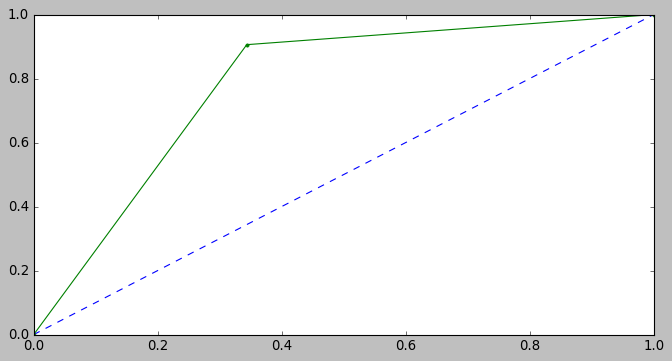

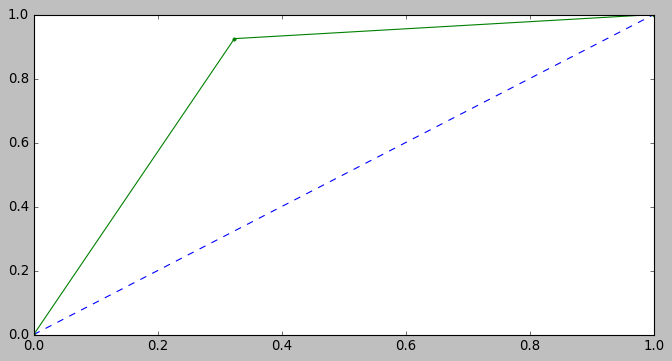

In [176]:
model = LogisticRegression(solver='newton-cg',max_iter=100,penalty='none',verbose=True,n_jobs=2)
# model = LogisticRegression(solver='liblinear',max_iter=10000,verbose=True,n_jobs=2)
model.fit(X_train, Y_train)

train_model_score = model.score(X_train, Y_train)
test_model_score = model.score(X_test, Y_test)
print('Training score:\n',train_model_score)
print('Test score:\n',test_model_score)


# Training Data Probability Prediction
pred_prob_train = model.predict(X_train)
# Test Data Probability Prediction
pred_prob_test = model.predict(X_test)

print("Confusion matrix for training data set:\n",metrics.confusion_matrix(Y_train, pred_prob_train))
print("Confusion matrix for testing data set:\n",metrics.confusion_matrix(Y_test, pred_prob_test))
print("classification report for training data set:\n",metrics.classification_report(Y_train, pred_prob_train))
print("classification report for testing data set:\n",metrics.classification_report(Y_test, pred_prob_test))
# calculate AUC

auc = metrics.roc_auc_score(Y_train,pred_prob_train)
print('AUC for the Training Data: %.3f' % auc)

auc = metrics.roc_auc_score(Y_test,pred_prob_test)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train)
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test)
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

In [225]:
df_test_pred=X_test.join(Y_test).join(pd.DataFrame(pred_class_test))
df_test_pred.rename(columns={df_test_pred.columns[9]:"predicted_vote"},inplace=True)
df_test_pred[['vote','predicted_vote','age']].groupby(by=['vote','predicted_vote']).count()

age
vote predicted_vote     
0    0.0               9
     1.0              24
1    0.0              33
     1.0              82

Training score:
 0.8266166822867854
Test score:
 0.8471615720524017
Confusion matrix for training data set:
 [[217 106]
 [ 79 665]]
Confusion matrix for testing data set:
 [[ 98  41]
 [ 29 290]]
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.73      0.67      0.70       323
           1       0.86      0.89      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.78      0.79      1067
weighted avg       0.82      0.83      0.82      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.77      0.71      0.74       139
           1       0.88      0.91      0.89       319

    accuracy                           0.85       458
   macro avg       0.82      0.81      0.81       458
weighted avg       0.84      0.85      0.85       458
 

AUC for the Training Data: 0.877
AUC for the Test Data: 0.9

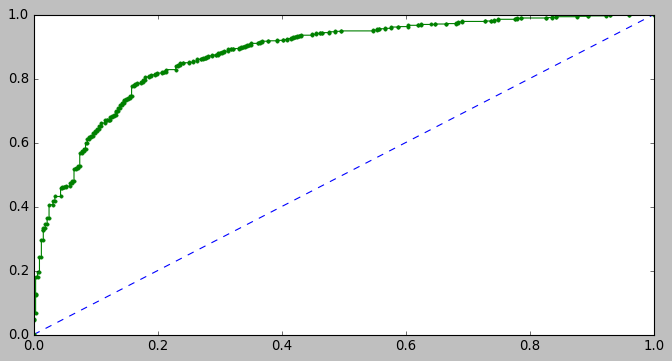

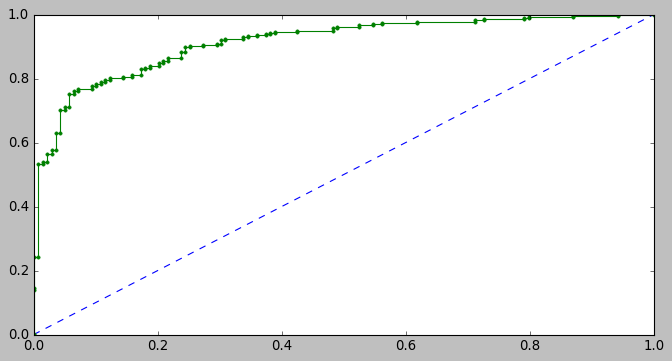

In [178]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)
train_model_score = model.score(X_train, Y_train)
test_model_score = model.score(X_test, Y_test)
print('Training score:\n',train_model_score)
print('Test score:\n',test_model_score)
print("Confusion matrix for training data set:\n",metrics.confusion_matrix(Y_train, pred_class_train))
print("Confusion matrix for testing data set:\n",metrics.confusion_matrix(Y_test, pred_class_test))
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)
# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

In [216]:
# X_test+Y_test+pred_class_test
df_test_pred=X_test.join(Y_test).join(pd.DataFrame(pred_class_test))
df_test_pred.rename(columns={df_test_pred.columns[9]:"predicted_vote"},inplace=True)
df_test_pred[['vote','predicted_vote','age']].groupby(by=['vote','predicted_vote']).count()



age
vote predicted_vote     
0    0.0               8
     1.0              25
1    0.0              33
     1.0              82

Training score:
 0.8266166822867854
Test score:
 0.8471615720524017
Confusion matrix for training data set:
 [[226  97]
 [ 88 656]]
Confusion matrix for testing data set:
 [[102  37]
 [ 33 286]]
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.72      0.70      0.71       323
           1       0.87      0.88      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.79      0.79      1067
weighted avg       0.83      0.83      0.83      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       139
           1       0.89      0.90      0.89       319

    accuracy                           0.85       458
   macro avg       0.82      0.82      0.82       458
weighted avg       0.85      0.85      0.85       458
 

AUC for the Training Data: 0.875
AUC for the Test Data: 0.9

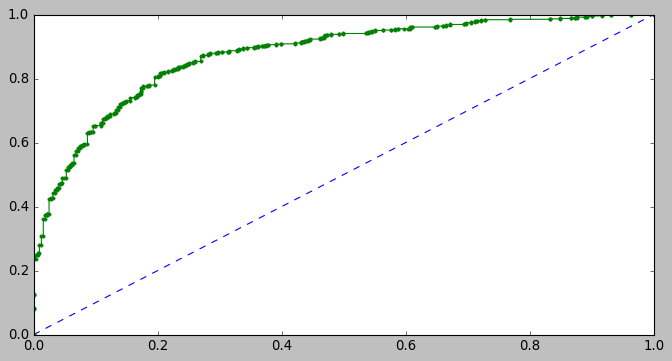

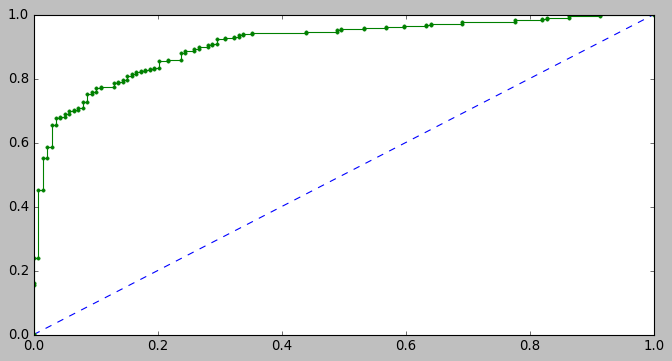

In [218]:
model = GaussianNB()
model.fit(X_train, Y_train)
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)
train_model_score = model.score(X_train, Y_train)
test_model_score = model.score(X_test, Y_test)
print('Training score:\n',train_model_score)
print('Test score:\n',test_model_score)
print("Confusion matrix for training data set:\n",metrics.confusion_matrix(Y_train, pred_class_train))
print("Confusion matrix for testing data set:\n",metrics.confusion_matrix(Y_test, pred_class_test))
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)
# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

In [219]:
df_test_pred=X_test.join(Y_test).join(pd.DataFrame(pred_class_test))
df_test_pred.rename(columns={df_test_pred.columns[9]:"predicted_vote"},inplace=True)
df_test_pred[['vote','predicted_vote','age']].groupby(by=['vote','predicted_vote']).count()

age
vote predicted_vote     
0    0.0              10
     1.0              23
1    0.0              30
     1.0              85

Training score:
 0.9990627928772259
Test score:
 0.8580786026200873
Confusion matrix for training data set:
 [[323   0]
 [  1 743]]
Confusion matrix for testing data set:
 [[ 99  40]
 [ 25 294]]
Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       1.00      1.00      1.00       744

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.80      0.71      0.75       139
           1       0.88      0.92      0.90       319

    accuracy                           0.86       458
   macro avg       0.84      0.82      0.83       458
weighted avg       0.86      0.86      0.86       458
 

AUC for the Training Data: 1.000
AUC for the Test Data: 0.9

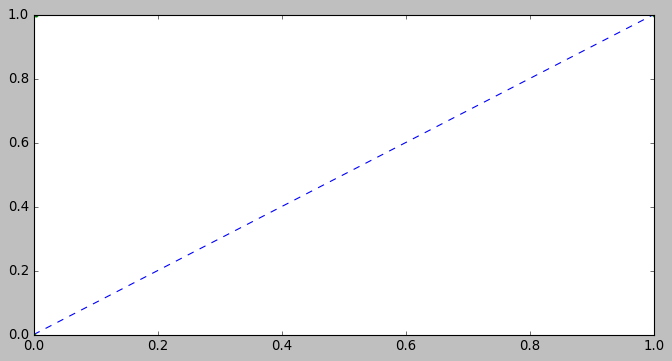

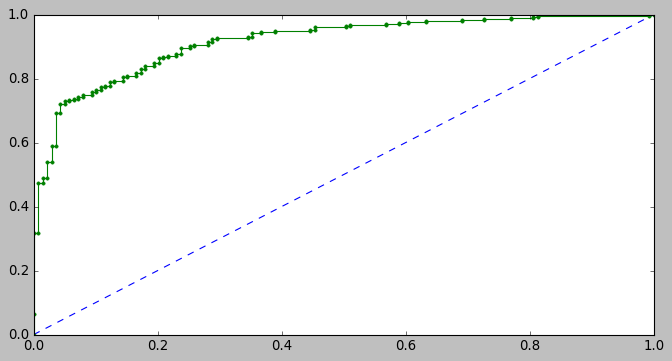

In [227]:
model=KNeighborsClassifier(n_neighbors=39,weights='distance')
model.fit(X_train,Y_train)

# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)
train_model_score = model.score(X_train, Y_train)
test_model_score = model.score(X_test, Y_test)
print('Training score:\n',train_model_score)
print('Test score:\n',test_model_score)
print("Confusion matrix for training data set:\n",metrics.confusion_matrix(Y_train, pred_class_train))
print("Confusion matrix for testing data set:\n",metrics.confusion_matrix(Y_test, pred_class_test))
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)
# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

In [228]:
df_test_pred=X_test.join(Y_test).join(pd.DataFrame(pred_class_test))
df_test_pred.rename(columns={df_test_pred.columns[9]:"predicted_vote"},inplace=True)
df_test_pred[['vote','predicted_vote','age']].groupby(by=['vote','predicted_vote']).count()

age
vote predicted_vote     
0    0.0               8
     1.0              25
1    0.0              31
     1.0              84

Training score:
 0.9990627928772259
Test score:
 0.8296943231441049
Confusion matrix for training data set:
 [[323   0]
 [  1 743]]
Confusion matrix for testing data set:
 [[ 95  44]
 [ 34 285]]
Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       1.00      1.00      1.00       744

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.74      0.68      0.71       139
           1       0.87      0.89      0.88       319

    accuracy                           0.83       458
   macro avg       0.80      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458
 

AUC for the Training Data: 1.000
AUC for the Test Data: 0.8

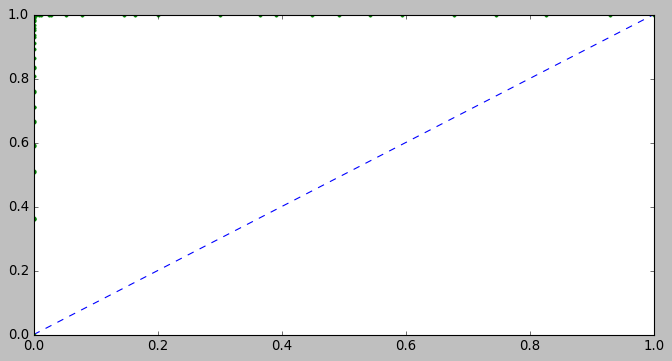

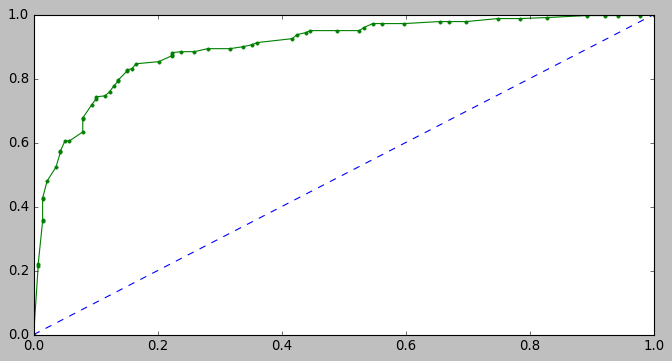

In [223]:
model = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=4)
model = model.fit(X_train, Y_train)

# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)
train_model_score = model.score(X_train, Y_train)
test_model_score = model.score(X_test, Y_test)
print('Training score:\n',train_model_score)
print('Test score:\n',test_model_score)
print("Confusion matrix for training data set:\n",metrics.confusion_matrix(Y_train, pred_class_train))
print("Confusion matrix for testing data set:\n",metrics.confusion_matrix(Y_test, pred_class_test))
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)
# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

In [224]:
df_test_pred=X_test.join(Y_test).join(pd.DataFrame(pred_class_test))
df_test_pred.rename(columns={df_test_pred.columns[9]:"predicted_vote"},inplace=True)
df_test_pred[['vote','predicted_vote','age']].groupby(by=['vote','predicted_vote']).count()

age
vote predicted_vote     
0    0.0               9
     1.0              24
1    0.0              33
     1.0              82

In [234]:
sm = SMOTE(random_state=2)
X_train_res, Y_train_res = sm.fit_sample(X_train, Y_train.ravel())
print(X_train_res.shape)
print(Y_train_res.shape)

(1488, 8)
(1488,)


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Training score:
 0.8198924731182796
Test score:
 0.8253275109170306
Confusion matrix for training data set:
 [[610 134]
 [134 610]]
Confusion matrix for testing data set:
 [[114  25]
 [ 55 264]]
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.82      0.82      0.82       744
           1       0.82      0.82      0.82       744

    accuracy                           0.82      1488
   macro avg       0.82      0.82      0.82      1488
weighted avg       0.82      0.82      0.82      1488
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.67      0.82      0.74       139
           1       0.91      0.83      0.87       319

    accuracy                           0.83       458
   macro avg       0.79      0.82      0.80       458
weighted avg       0.84      0.83      0.83       458
 

AUC for the Training Data: 0.884
AUC for the Test Data: 0.9

[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.7s finished


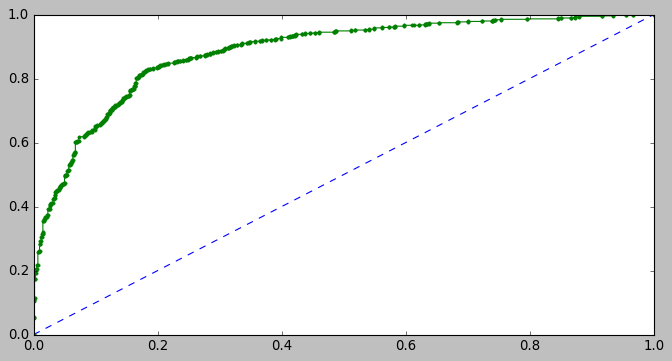

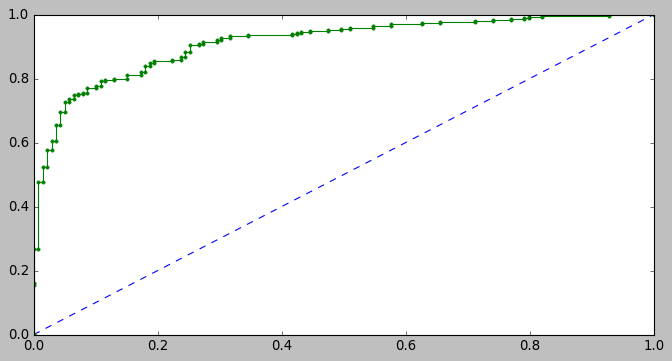

In [235]:
model = LogisticRegression(solver='newton-cg',max_iter=100,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train_res, Y_train_res)

# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train_res)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)
train_model_score = model.score(X_train_res, Y_train_res)
test_model_score = model.score(X_test, Y_test)
print('Training score:\n',train_model_score)
print('Test score:\n',test_model_score)
print("Confusion matrix for training data set:\n",metrics.confusion_matrix(Y_train_res, pred_class_train))
print("Confusion matrix for testing data set:\n",metrics.confusion_matrix(Y_test, pred_class_test))
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train_res,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train_res)
# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

# calculate AUC
auc = metrics.roc_auc_score(Y_train_res,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train_res,pred_prob_train[:,1])
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

In [236]:
df_test_pred=X_test.join(Y_test).join(pd.DataFrame(pred_class_test))
df_test_pred.rename(columns={df_test_pred.columns[9]:"predicted_vote"},inplace=True)
df_test_pred[['vote','predicted_vote','age']].groupby(by=['vote','predicted_vote']).count()

age
vote predicted_vote     
0    0.0              12
     1.0              21
1    0.0              41
     1.0              74

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Training score:
 0.8198924731182796
Test score:
 0.8253275109170306
Confusion matrix for training data set:
 [[610 134]
 [134 610]]
Confusion matrix for testing data set:
 [[114  25]
 [ 55 264]]
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.82      0.82      0.82       744
           1       0.82      0.82      0.82       744

    accuracy                           0.82      1488
   macro avg       0.82      0.82      0.82      1488
weighted avg       0.82      0.82      0.82      1488
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.67      0.82      0.74       139
           1       0.91      0.83      0.87       319

    accuracy                           0.83       458
   macro avg       0.79      0.82      0.80       458
weighted avg       0.84      0.83      0.83       458
 

AUC for the Training Data: 0.884
AUC for the Test Data: 0.9

[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.4s finished


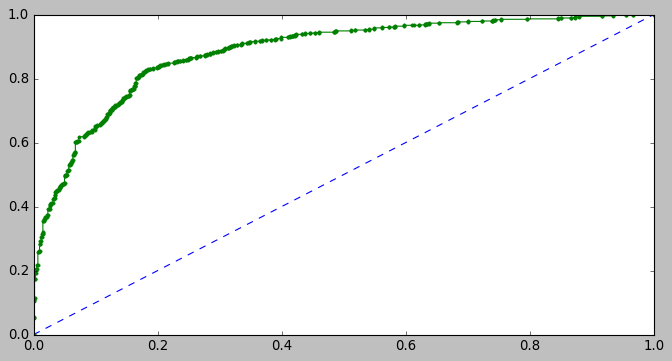

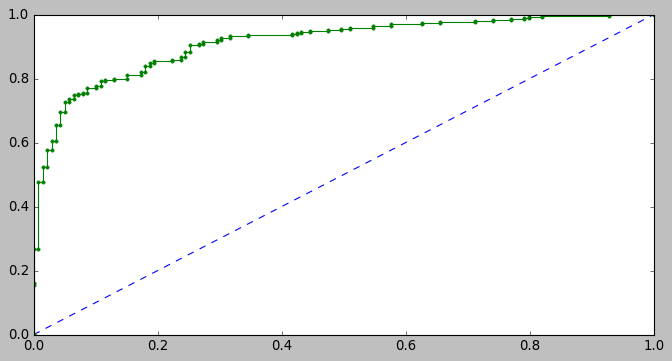

In [237]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model.fit(X_train_res, Y_train_res)

# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train_res)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)
train_model_score = model.score(X_train_res, Y_train_res)
test_model_score = model.score(X_test, Y_test)
print('Training score:\n',train_model_score)
print('Test score:\n',test_model_score)
print("Confusion matrix for training data set:\n",metrics.confusion_matrix(Y_train_res, pred_class_train))
print("Confusion matrix for testing data set:\n",metrics.confusion_matrix(Y_test, pred_class_test))
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train_res,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train_res)
# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

# calculate AUC
auc = metrics.roc_auc_score(Y_train_res,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train_res,pred_prob_train[:,1])
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

In [238]:
df_test_pred=X_test.join(Y_test).join(pd.DataFrame(pred_class_test))
df_test_pred.rename(columns={df_test_pred.columns[9]:"predicted_vote"},inplace=True)
df_test_pred[['vote','predicted_vote','age']].groupby(by=['vote','predicted_vote']).count()

age
vote predicted_vote     
0    0.0              12
     1.0              21
1    0.0              41
     1.0              74

Training score:
 0.8125
Test score:
 0.8253275109170306
Confusion matrix for training data set:
 [[600 144]
 [135 609]]
Confusion matrix for testing data set:
 [[112  27]
 [ 53 266]]
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.82      0.81      0.81       744
           1       0.81      0.82      0.81       744

    accuracy                           0.81      1488
   macro avg       0.81      0.81      0.81      1488
weighted avg       0.81      0.81      0.81      1488
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.68      0.81      0.74       139
           1       0.91      0.83      0.87       319

    accuracy                           0.83       458
   macro avg       0.79      0.82      0.80       458
weighted avg       0.84      0.83      0.83       458
 

AUC for the Training Data: 0.886
AUC for the Test Data: 0.908


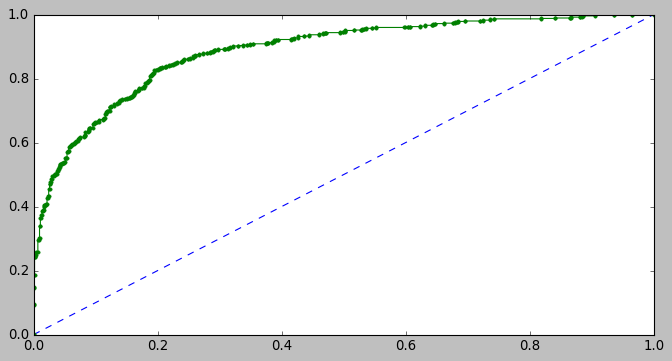

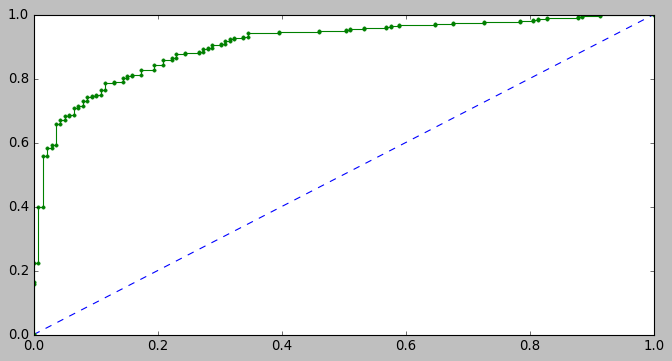

In [239]:
model = GaussianNB()
model.fit(X_train_res, Y_train_res)

# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train_res)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)
train_model_score = model.score(X_train_res, Y_train_res)
test_model_score = model.score(X_test, Y_test)
print('Training score:\n',train_model_score)
print('Test score:\n',test_model_score)
print("Confusion matrix for training data set:\n",metrics.confusion_matrix(Y_train_res, pred_class_train))
print("Confusion matrix for testing data set:\n",metrics.confusion_matrix(Y_test, pred_class_test))
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train_res,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train_res)
# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

# calculate AUC
auc = metrics.roc_auc_score(Y_train_res,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train_res,pred_prob_train[:,1])
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

In [240]:
df_test_pred=X_test.join(Y_test).join(pd.DataFrame(pred_class_test))
df_test_pred.rename(columns={df_test_pred.columns[9]:"predicted_vote"},inplace=True)
df_test_pred[['vote','predicted_vote','age']].groupby(by=['vote','predicted_vote']).count()

age
vote predicted_vote     
0    0.0              12
     1.0              21
1    0.0              40
     1.0              75

Training score:
 0.8918010752688172
Test score:
 0.7903930131004366
Confusion matrix for training data set:
 [[715  29]
 [132 612]]
Confusion matrix for testing data set:
 [[114  25]
 [ 71 248]]
Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.84      0.96      0.90       744
           1       0.95      0.82      0.88       744

    accuracy                           0.89      1488
   macro avg       0.90      0.89      0.89      1488
weighted avg       0.90      0.89      0.89      1488
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.62      0.82      0.70       139
           1       0.91      0.78      0.84       319

    accuracy                           0.79       458
   macro avg       0.76      0.80      0.77       458
weighted avg       0.82      0.79      0.80       458
 

AUC for the Training Data: 0.965
AUC for the Test Data: 0.8

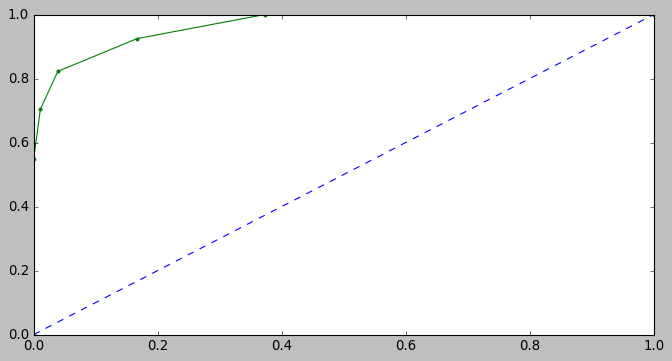

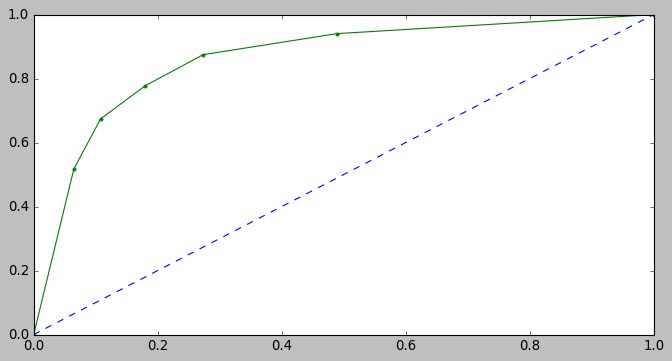

In [241]:
model =KNeighborsClassifier()
model.fit(X_train_res, Y_train_res)

# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train_res)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)
train_model_score = model.score(X_train_res, Y_train_res)
test_model_score = model.score(X_test, Y_test)
print('Training score:\n',train_model_score)
print('Test score:\n',test_model_score)
print("Confusion matrix for training data set:\n",metrics.confusion_matrix(Y_train_res, pred_class_train))
print("Confusion matrix for testing data set:\n",metrics.confusion_matrix(Y_test, pred_class_test))
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train_res,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train_res)
# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

# calculate AUC
auc = metrics.roc_auc_score(Y_train_res,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train_res,pred_prob_train[:,1])
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

In [242]:
df_test_pred=X_test.join(Y_test).join(pd.DataFrame(pred_class_test))
df_test_pred.rename(columns={df_test_pred.columns[9]:"predicted_vote"},inplace=True)
df_test_pred[['vote','predicted_vote','age']].groupby(by=['vote','predicted_vote']).count()

age
vote predicted_vote     
0    0.0              13
     1.0              20
1    0.0              43
     1.0              72

In [3]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\nswam\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [4]:
type(inaugural.raw('1941-Roosevelt.txt'))

str

In [8]:
speech_r=inaugural.raw('1941-Roosevelt.txt')
speech_k=inaugural.raw('1961-Kennedy.txt')
speech_n=inaugural.raw('1973-Nixon.txt')
print(speech_r)
print('----------------------------------------------------------------------')
print(speech_k)
print('----------------------------------------------------------------------')
print(speech_n)
print('----------------------------------------------------------------------')

On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.

In Washington's day the task of the people was to create and weld together a nation.

In Lincoln's day the task of the people was to preserve that Nation from disruption from within.

In this day the task of the people is to save that Nation and its institutions from disruption from without.

To us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.

Lives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.

There are men who doubt this. There are men who believe that democracy, as a form 

In [9]:
totalwords_r= len(speech_r.split())
totalwords_k= len(speech_k.split())
totalwords_n= len(speech_n.split())
print('Total words spoken by President Roosevelt:%s\n' %(totalwords_r))
print('Total words spoken by President Kennedy:%s\n' %(totalwords_k))
print('Total words spoken by President Nixon:%s\n' %(totalwords_n))

Total words spoken by President Roosevelt:1360

Total words spoken by President Kennedy:1390

Total words spoken by President Nixon:1819



In [10]:
total_char_r=len(speech_r)
total_char_k=len(speech_k)
total_char_n=len(speech_n)

print('Total characters in the speech from President Roosevelt:%s\n' %(total_char_r))
print('Total characters in the speech from President Kennedy:%s\n' %(total_char_r))
print('Total characters in the speech from President Nixon:%s\n' %(total_char_r))

Total characters in the speech from President Roosevelt:7571

Total characters in the speech from President Kennedy:7571

Total characters in the speech from President Nixon:7571



In [220]:
total_num_of_sentences_r=len(speech_r.split(sep='\n\n'))
total_num_of_sentences_k=len(speech_k.split(sep='\n\n'))
total_num_of_sentences_n=len(speech_n.split(sep='\n\n'))

print('Total sentences in the speech from President Roosevelt:%s\n' %(total_num_of_sentences_r))
print('Total sentences in the speech from President Kennedy:%s\n' %(total_num_of_sentences_k))
print('Total sentences in the speech from President Nixon:%s\n' %(total_num_of_sentences_n))

Total sentences in the speech from President Roosevelt:38

Total sentences in the speech from President Kennedy:27

Total sentences in the speech from President Nixon:51



In [16]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS 

In [13]:
nltk.FreqDist(speech_r.split()).most_common(10)

[('the', 104),
 ('of', 81),
 ('and', 41),
 ('to', 35),
 ('in', 30),
 ('a', 28),
 ('is', 24),
 ('--', 22),
 ('we', 22),
 ('that', 21)]

In [19]:
nltk.FreqDist(speech_k.split()).most_common(10)

[('the', 86),
 ('of', 65),
 ('to', 42),
 ('and', 41),
 ('we', 30),
 ('a', 29),
 ('in', 26),
 ('--', 24),
 ('our', 21),
 ('not', 19)]

In [21]:
nltk.FreqDist(speech_n.split()).most_common(10)

[('the', 83),
 ('of', 68),
 ('to', 65),
 ('in', 58),
 ('and', 50),
 ('we', 47),
 ('a', 35),
 ('that', 33),
 ('our', 32),
 ('for', 32)]

In [39]:
stop = stopwords.words('english')
addl_words=['--']
speech_r=speech_r.lower()
speech_k=speech_k.lower()
speech_n=speech_n.lower()
processed_speech_r=" "
processed_speech_k=" "
processed_speech_n=" "
cleaned_speech_r=" "
cleaned_speech_k=" "
cleaned_speech_n=" "
stemmed_speech_r=" "
stemmed_speech_k=" "
stemmed_speech_n=" "
st = PorterStemmer()


for word in speech_r.split():
    if word not in stop:
        processed_speech_r=processed_speech_r+" "+word

for word in processed_speech_r.split():
    if word not in addl_words:
        cleaned_speech_r=cleaned_speech_r+" "+word

for p_word in cleaned_speech_r.split():
        stemmed_speech_r=stemmed_speech_r+" "+st.stem(p_word)
        
for word in speech_k.split():
    if word not in stop:
        processed_speech_k=processed_speech_k+" "+word
        
for word in processed_speech_k.split():
    if word not in addl_words:
        cleaned_speech_k=cleaned_speech_k+" "+word

for p_word in cleaned_speech_k.split():
        stemmed_speech_k=stemmed_speech_k+" "+st.stem(p_word)
        
for word in speech_n.split():
    if word not in stop:
        processed_speech_n=processed_speech_n+" "+word

        
for word in processed_speech_n.split():
    if word not in addl_words:
        cleaned_speech_n=cleaned_speech_n+" "+word

for p_word in cleaned_speech_n.split():
        stemmed_speech_n=stemmed_speech_n+" "+st.stem(p_word)


nltk.FreqDist(processed_speech_r.split()).most_common(10) 
# nltk.FreqDist(processed_speech_k.split()).most_common(10)
# nltk.FreqDist(processed_speech_n.split()).most_common(10) 

[('--', 22),
 ('know', 9),
 ('us', 8),
 ('life', 6),
 ('people', 5),
 ('nation', 5),
 ('human', 5),
 ('years', 5),
 ('freedom', 5),
 ('democracy', 5)]

In [43]:
nltk.FreqDist(processed_speech_k.split()).most_common(10)

[('--', 24),
 ('let', 16),
 ('us', 11),
 ('new', 7),
 ('pledge', 7),
 ('sides', 7),
 ('shall', 5),
 ('ask', 5),
 ('president', 4),
 ('fellow', 4)]

In [44]:
nltk.FreqDist(processed_speech_n.split()).most_common(10)

[('us', 25),
 ('let', 22),
 ('--', 17),
 ('new', 15),
 ('peace', 11),
 ('great', 9),
 ('america', 9),
 ('world.', 8),
 ("america's", 8),
 ('shall', 7)]

In [45]:
nltk.FreqDist(cleaned_speech_r.split()).most_common(10) 

[('know', 9),
 ('us', 8),
 ('life', 6),
 ('people', 5),
 ('nation', 5),
 ('human', 5),
 ('years', 5),
 ('freedom', 5),
 ('democracy', 5),
 ('spirit', 5)]

In [46]:
nltk.FreqDist(cleaned_speech_k.split()).most_common(10) 

[('let', 16),
 ('us', 11),
 ('new', 7),
 ('pledge', 7),
 ('sides', 7),
 ('shall', 5),
 ('ask', 5),
 ('president', 4),
 ('fellow', 4),
 ('freedom', 4)]

In [47]:
nltk.FreqDist(cleaned_speech_n.split()).most_common(10) 

[('us', 25),
 ('let', 22),
 ('new', 15),
 ('peace', 11),
 ('great', 9),
 ('america', 9),
 ('world.', 8),
 ("america's", 8),
 ('shall', 7),
 ('policies', 7)]

In [48]:
nltk.FreqDist(stemmed_speech_r.split()).most_common(10)

[('nation', 10),
 ('know', 9),
 ('us', 8),
 ('life', 6),
 ('year', 6),
 ('peopl', 5),
 ('live', 5),
 ('human', 5),
 ('measur', 5),
 ('freedom', 5)]

In [49]:
nltk.FreqDist(stemmed_speech_k.split()).most_common(10)

[('let', 16),
 ('us', 11),
 ('power', 7),
 ('new', 7),
 ('pledg', 7),
 ('side', 7),
 ('nation', 6),
 ('ask', 6),
 ('shall', 5),
 ('presid', 4)]

In [52]:
nltk.FreqDist(stemmed_speech_n.split()).most_common(10)

[('us', 25),
 ('let', 22),
 ('new', 15),
 ('peac', 11),
 ('great', 9),
 ('america', 9),
 ('world.', 8),
 ('respons', 8),
 ('nation', 8),
 ("america'", 8)]

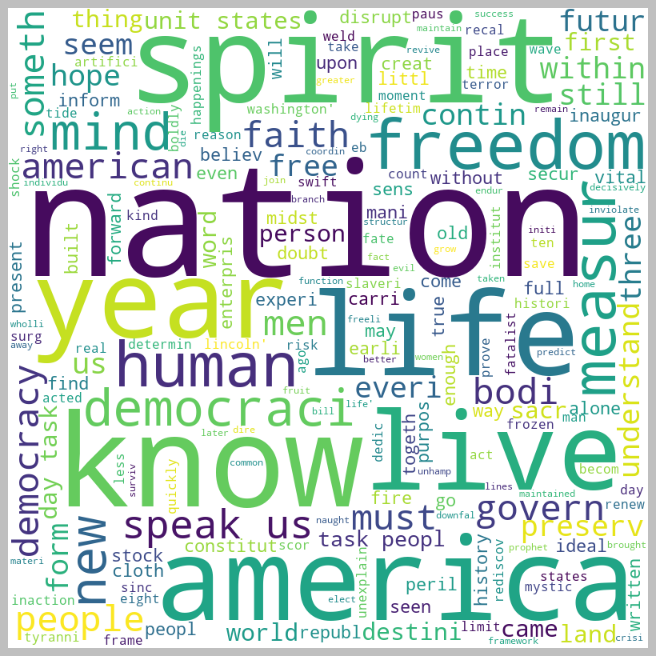

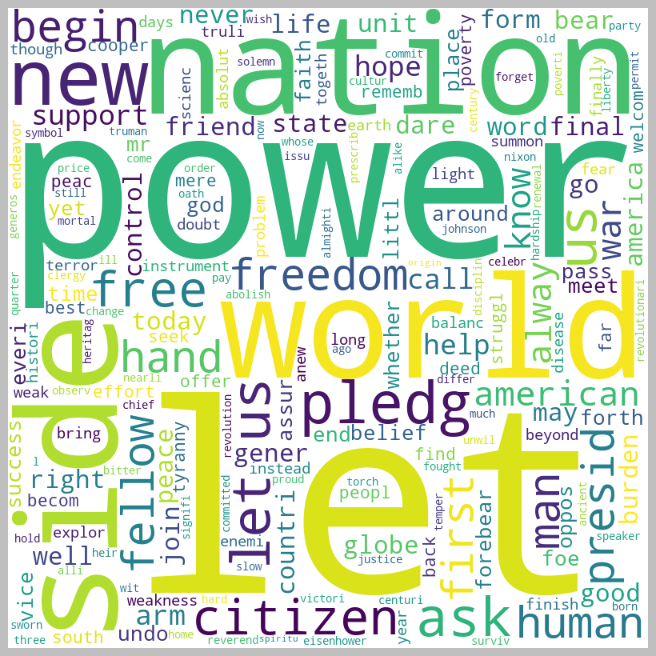

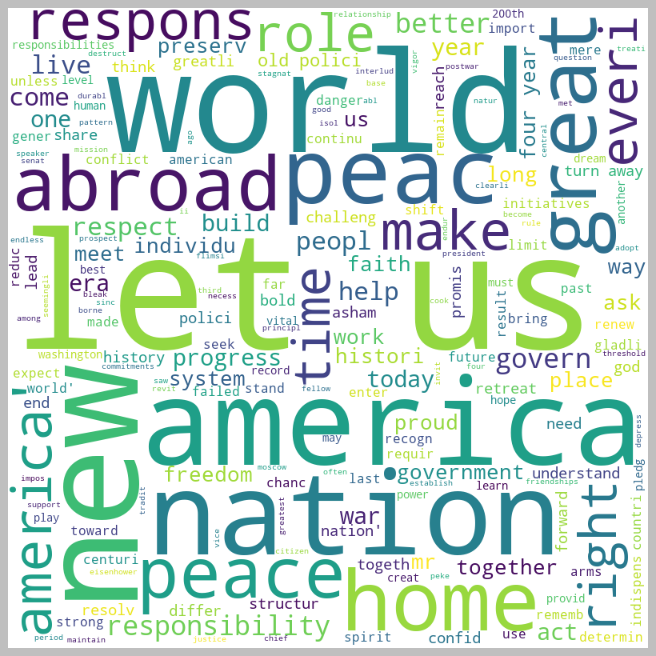

In [51]:
wordcloud_r = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(stemmed_speech_r) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_r) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

wordcloud_k = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(stemmed_speech_k) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_k) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

wordcloud_n = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(stemmed_speech_n) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_n) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 